# Imports

In [35]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Dataset

In [36]:
main_df = pd.read_csv('customer.csv')
main_df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Unnamed: 5,Unnamed: 6
0,1,Male,19,15,39,NaN,NaN
1,2,Male,21,15,81,NaN,NaN
2,3,Female,20,16,6,NaN,NaN
3,4,Female,23,16,77,NaN,NaN
4,5,Female,31,17,40,NaN,NaN


# K-Means

### Data

In [37]:
km_df = main_df

### Draws

Text(0, 0.5, 'Annual_Income')

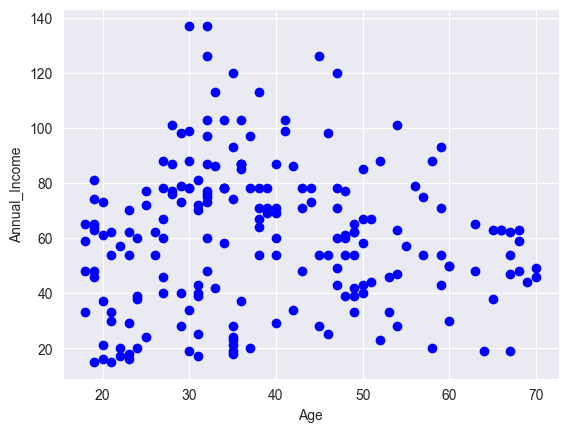

In [38]:
plt.scatter(km_df['Age'],km_df['Annual_Income'], color='blue')
plt.xlabel('Age')
plt.ylabel('Annual_Income')

Text(0, 0.5, 'Spending_Score')

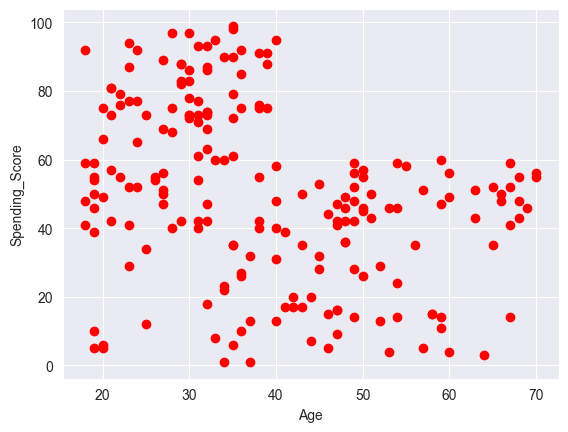

In [39]:
plt.scatter(km_df['Age'],km_df['Spending_Score'], color='red')
plt.xlabel('Age')
plt.ylabel('Spending_Score')

Text(0, 0.5, 'Annual_Income')

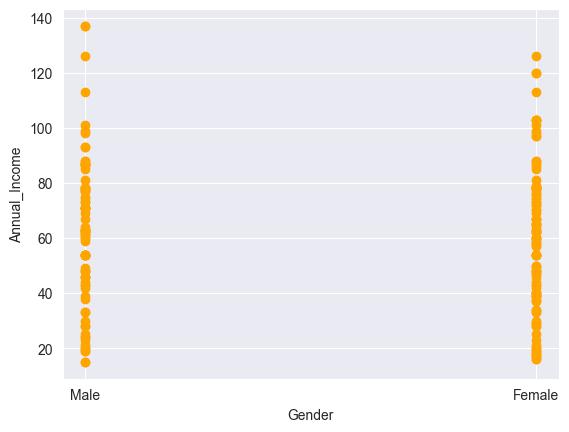

In [40]:
plt.scatter(km_df['Gender'],km_df['Annual_Income'], color='orange')
plt.xlabel('Gender')
plt.ylabel('Annual_Income')

### Pre-Process

In [41]:
km_df['Gender_num'] = km_df['Gender'].replace({'Male':0,'Female':1})
km_df.head()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_19104\1075065929.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  km_df['Gender_num'] = km_df['Gender'].replace({'Male':0,'Female':1})


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Unnamed: 5,Unnamed: 6,Gender_num
0,1,Male,19,15,39,NaN,NaN,0
1,2,Male,21,15,81,NaN,NaN,0
2,3,Female,20,16,6,NaN,NaN,1
3,4,Female,23,16,77,NaN,NaN,1
4,5,Female,31,17,40,NaN,NaN,1


In [42]:
numeric_km_df = km_df.drop(['CustomerID', 'Gender'], axis=1)
numeric_km_df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_num']].apply(pd.to_numeric, errors='coerce')
numeric_km_df = numeric_km_df.dropna()
numeric_km_df = numeric_km_df.reset_index()
numeric_km_df = numeric_km_df.astype('float64')
print(numeric_km_df.dtypes)
print(numeric_km_df.shape)

index             float64
Age               float64
Annual_Income     float64
Spending_Score    float64
Unnamed: 5        float64
Unnamed: 6        float64
Gender_num        float64
dtype: object
(0, 7)


In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x = numeric_km_df.values
norm_x = MinMaxScaler().fit_transform(x)
norm_x[0:5]

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by MinMaxScaler.

### Modelling (K-Means)

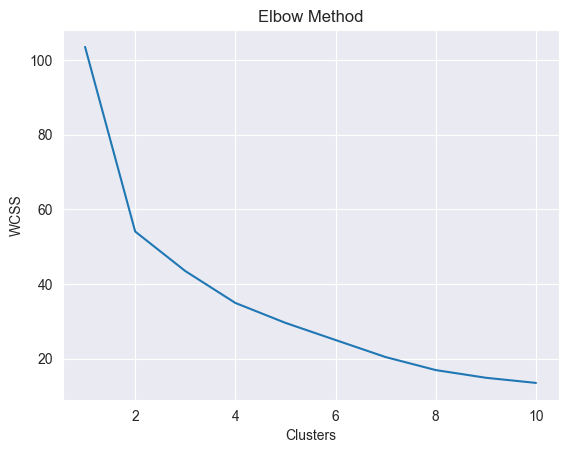

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Unnamed: 5,Unnamed: 6,Gender_num
0,1,Male,19,15,39,NaN,NaN,0
1,2,Male,21,15,81,NaN,NaN,0
2,3,Female,20,16,6,NaN,NaN,1
3,4,Female,23,16,77,NaN,NaN,1
4,5,Female,31,17,40,NaN,NaN,1


In [44]:
from sklearn.cluster import KMeans 

wcss = []
for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(norm_x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


km_df.head()

In [45]:
from sklearn.metrics import silhouette_score

optimal_k = 10

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(norm_x)
labels = kmeans.labels_
silhouette_avg = silhouette_score(norm_x, labels)
print(f"Silhouette Score for {optimal_k} = {silhouette_avg}")


Silhouette Score for 10 = 0.4213418319730954


In [46]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(norm_x, labels)
print(f"DB Index: {db_score}")


DB Index: 0.7926543972871609


<Axes: >

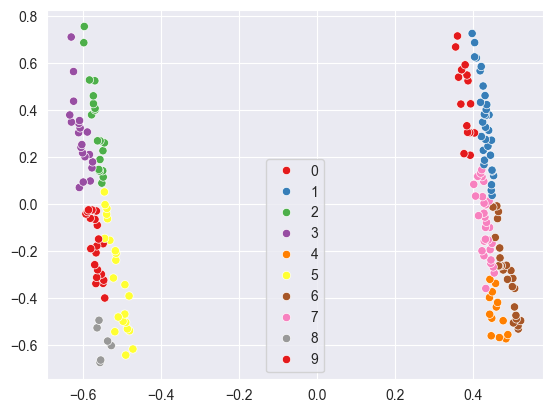

In [47]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_data = pca.fit_transform(norm_x)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette="Set1")

# IT IS SHIT!

# Hierarchical

### Dataset & Pre-Process

In [51]:
he_df = main_df

he_df['Gender_num'] = he_df['Gender'].replace({'Male':0,'Female':1})
he_df.head()

numeric_he_df = he_df.drop(['CustomerID', 'Gender', 'Unnamed: 5', 'Unnamed: 6'], axis=1)
numeric_he_df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_num']].apply(pd.to_numeric, errors='coerce')
numeric_he_df = numeric_he_df.dropna()
numeric_he_df = numeric_he_df.reset_index()
numeric_he_df = numeric_he_df.astype('float64')
print(numeric_he_df.dtypes)
print(numeric_he_df.shape)

index             float64
Age               float64
Annual_Income     float64
Spending_Score    float64
Gender_num        float64
dtype: object
(200, 5)


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_19104\3210142059.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  he_df['Gender_num'] = he_df['Gender'].replace({'Male':0,'Female':1})


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x = numeric_he_df.values
norm_x = MinMaxScaler().fit_transform(x)
norm_x[0:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 , 0.        ],
       [0.00502513, 0.05769231, 0.        , 0.81632653, 0.        ],
       [0.01005025, 0.03846154, 0.00819672, 0.05102041, 1.        ],
       [0.01507538, 0.09615385, 0.00819672, 0.7755102 , 1.        ],
       [0.0201005 , 0.25      , 0.01639344, 0.39795918, 1.        ]])

### Modelling

In [53]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy

dist_matrix = euclidean_distances(norm_x, norm_x)
z = hierarchy.linkage(dist_matrix, method='complete')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_19104\3611250398.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix, method='complete')


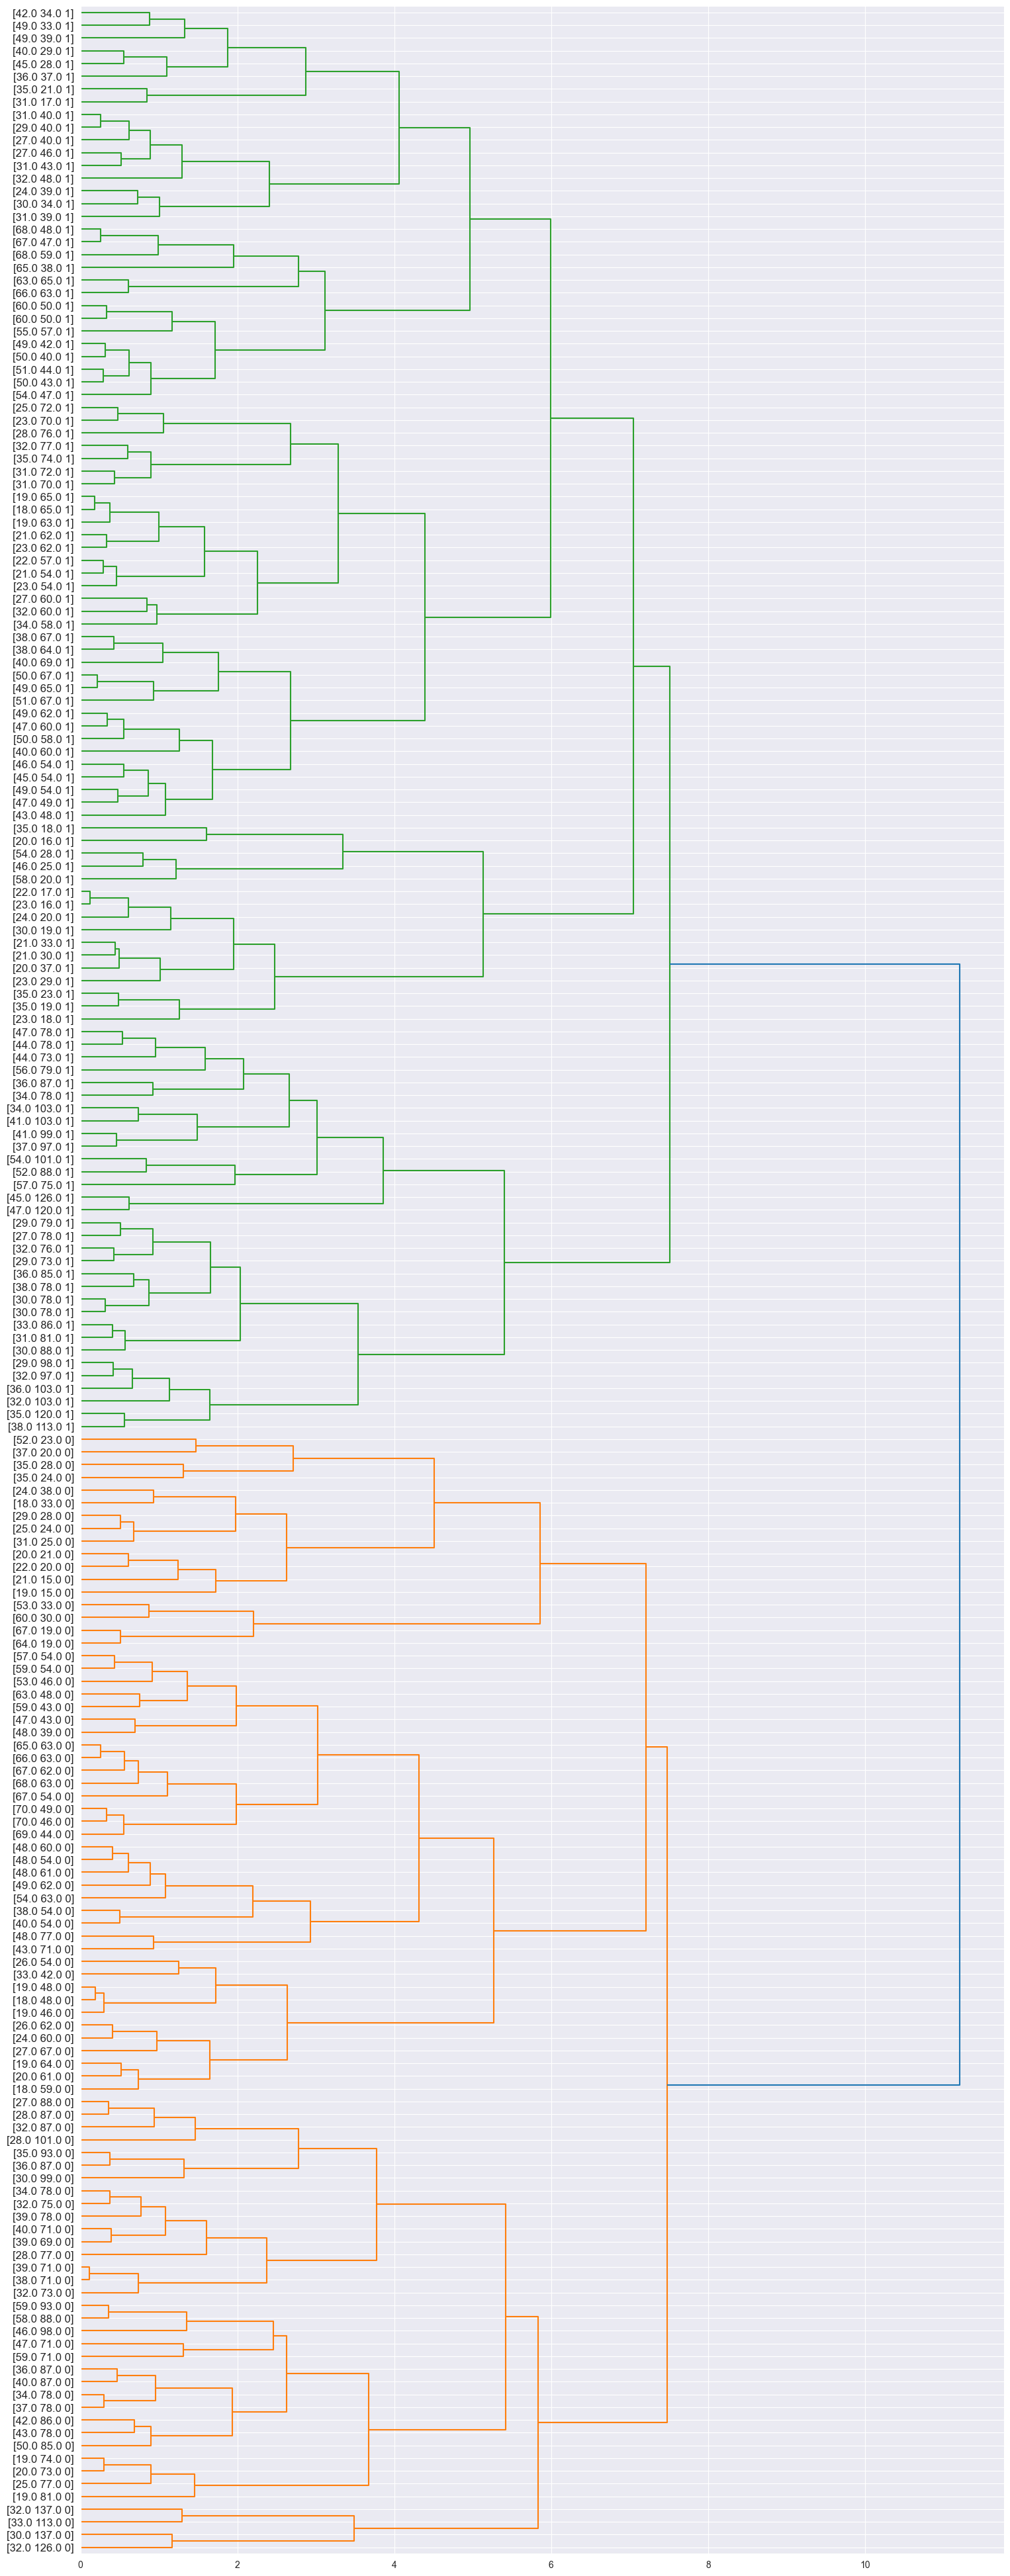

In [54]:
import pylab

fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (numeric_he_df['Age'][id], numeric_he_df['Annual_Income'][id], int(float(numeric_he_df['Gender_num'][id])) )
    
dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [56]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')

agglom.fit(dist_matrix)

labels = agglom.labels_

he_df['clusters'] = agglom.labels_
numeric_he_df['clusters'] = agglom.labels_

labels

D:\Future\ML\0. Jadi\Codes MK\My Coding\venv\lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 5, 5, 0, 5, 5, 5, 1, 5, 1, 5, 5, 5, 1, 1, 0, 1, 1, 5, 1, 1,
       5, 1, 5, 1, 0, 1, 0, 5, 1, 5, 1, 1, 0, 5, 0, 0, 0, 5, 0, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 4, 4,
       0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4,
       4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 4, 3, 3, 3, 3, 3,
       0, 0, 3, 2, 2, 3, 3, 0, 2, 3, 0, 2, 3, 3, 4, 0, 2, 3, 3, 3, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 3])

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_19104\999299146.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['Age'], subset['Annual_Income'], s= subset['Spending_Score']*10, c=color, label='cluster'+str(label),alpha=0.5)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_19104\999299146.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['Age'], subset['Annual_Income'], s= subset['Sp

Text(0, 0.5, 'Annual_Income')

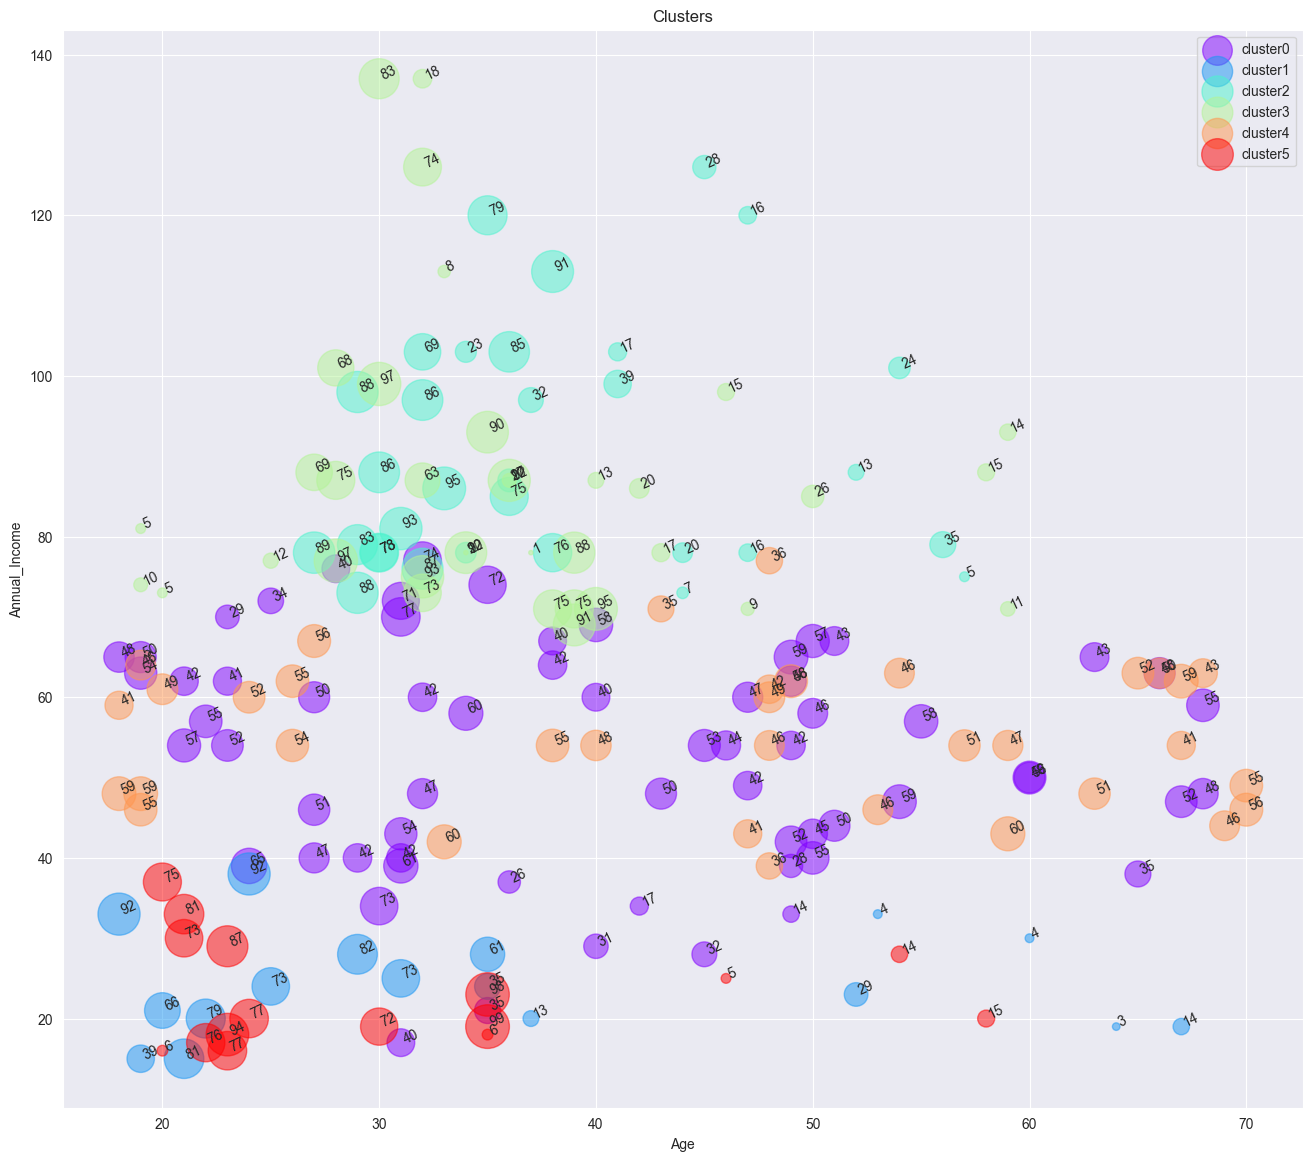

In [57]:
import matplotlib.cm as cm

n_clusters = max(labels)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))


plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = he_df[he_df.clusters == label]
    for i in subset.index:
        plt.text(subset['Age'][i], subset['Annual_Income'][i], str(subset['Spending_Score'][i]), rotation=25) 
    plt.scatter(subset['Age'], subset['Annual_Income'], s= subset['Spending_Score']*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Annual_Income')

In [58]:
agg = numeric_he_df.groupby(['clusters','Gender_num'])[['Annual_Income','Spending_Score','Age']].mean()
agg

,,Annual_Income,Spending_Score,Age
clusters,Gender_num,,,
0,1.0,52.640625,47.984375,40.015625
1,0.0,24.411765,49.411765,36.000000
2,1.0,90.593750,54.531250,38.000000
3,0.0,86.750000,47.166667,36.055556
4,0.0,55.371429,49.457143,45.514286
5,1.0,23.000000,59.687500,30.625000


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_19104\3386865593.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Annual_Income, subset.Spending_Score, s=subset.Age*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'Spending_Score')

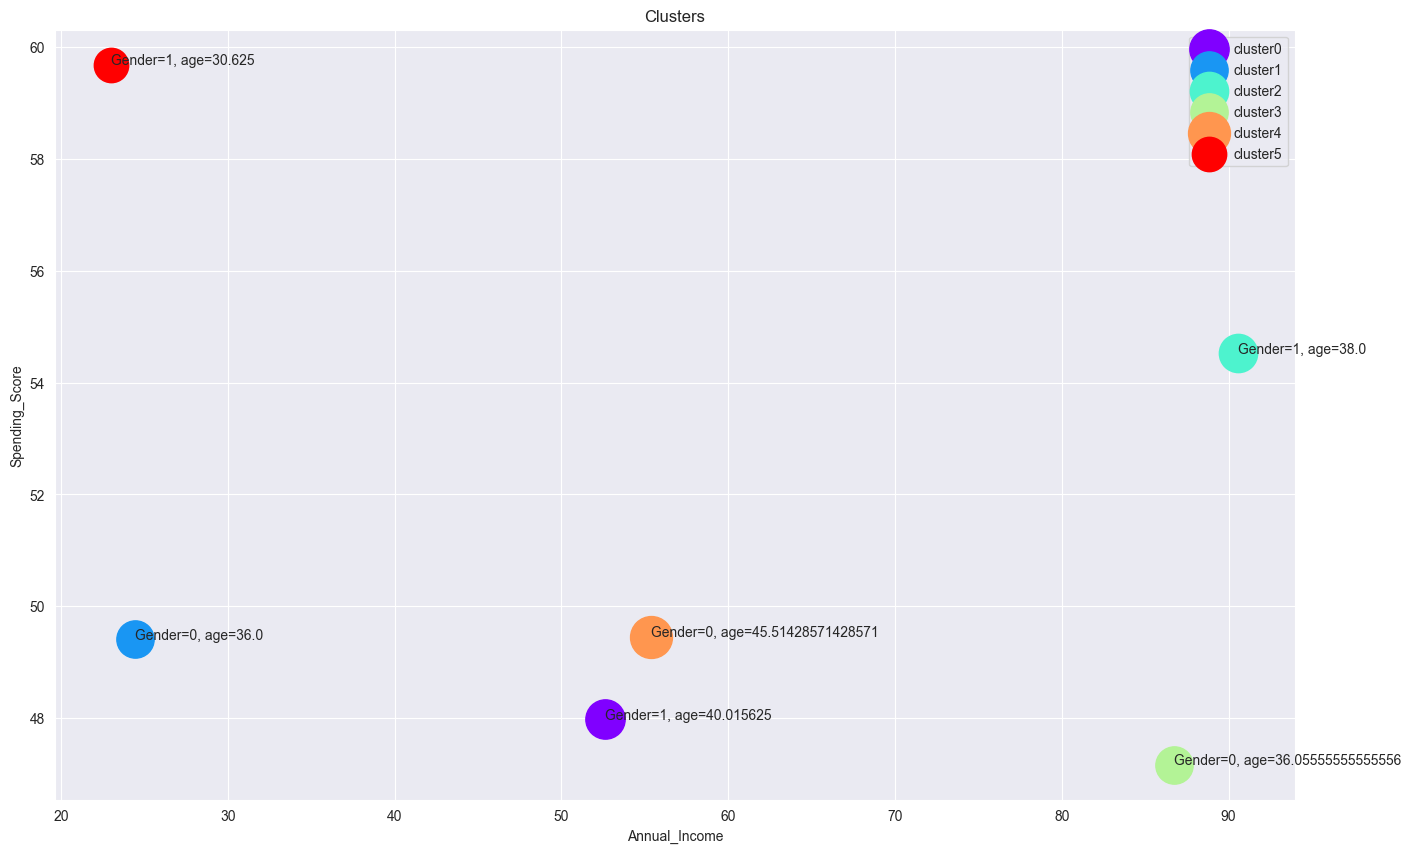

In [63]:
plt.figure(figsize=(16,10))

# subset = agg.loc[(cluster_labels,),]
# subset.loc[0].Spending_Score

for color, label in zip(colors, cluster_labels):
    subset = agg.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i].Annual_Income, subset.loc[i].Spending_Score, 'Gender='+str(int(i)) + ', age='+str(subset.loc[i].Age))
    plt.scatter(subset.Annual_Income, subset.Spending_Score, s=subset.Age*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')


# DBSCAN

### Dataset & Pre-Process

In [65]:
db_df = main_df

db_df['Gender_num'] = db_df['Gender'].replace({'Male':0,'Female':1})
db_df.head()

numeric_db_df = db_df.drop(['CustomerID', 'Gender', 'Unnamed: 5', 'Unnamed: 6'], axis=1)
numeric_db_df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_num']].apply(pd.to_numeric, errors='coerce')
numeric_db_df = numeric_db_df.dropna()
numeric_db_df = numeric_db_df.reset_index()
numeric_db_df = numeric_db_df.astype('float64')
print(numeric_db_df.dtypes)
print(numeric_db_df.shape)

index             float64
Age               float64
Annual_Income     float64
Spending_Score    float64
Gender_num        float64
clusters          float64
dtype: object
(200, 6)


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_19104\2805990973.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db_df['Gender_num'] = db_df['Gender'].replace({'Male':0,'Female':1})


In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x = numeric_db_df.values
norm_x = MinMaxScaler().fit_transform(x)

array([[0.        , 0.01923077, 0.        , 0.3877551 , 0.        ,
        0.2       ],
       [0.00502513, 0.05769231, 0.        , 0.81632653, 0.        ,
        0.2       ],
       [0.01005025, 0.03846154, 0.00819672, 0.05102041, 1.        ,
        1.        ],
       [0.01507538, 0.09615385, 0.00819672, 0.7755102 , 1.        ,
        1.        ],
       [0.0201005 , 0.25      , 0.01639344, 0.39795918, 1.        ,
        0.        ]])

In [86]:
from sklearn.cluster import dbscan, DBSCAN

db = DBSCAN(eps=0.4, min_samples=5, algorithm='auto').fit(norm_x)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)

numeric_db_df['Clusters']=labels
db_df['Clusters']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

db_df[['Clusters','Age','Annual_Income', 'Spending_Score', 'Gender']].head(5)
db_df[['Clusters','Age','Annual_Income', 'Spending_Score', 'Gender_num']].head(5)

,Clusters,Age,Annual_Income,Spending_Score,Gender_num
0,0,19,15,39,0
1,0,21,15,81,0
2,-1,20,16,6,1
3,1,23,16,77,1
4,2,31,17,40,1


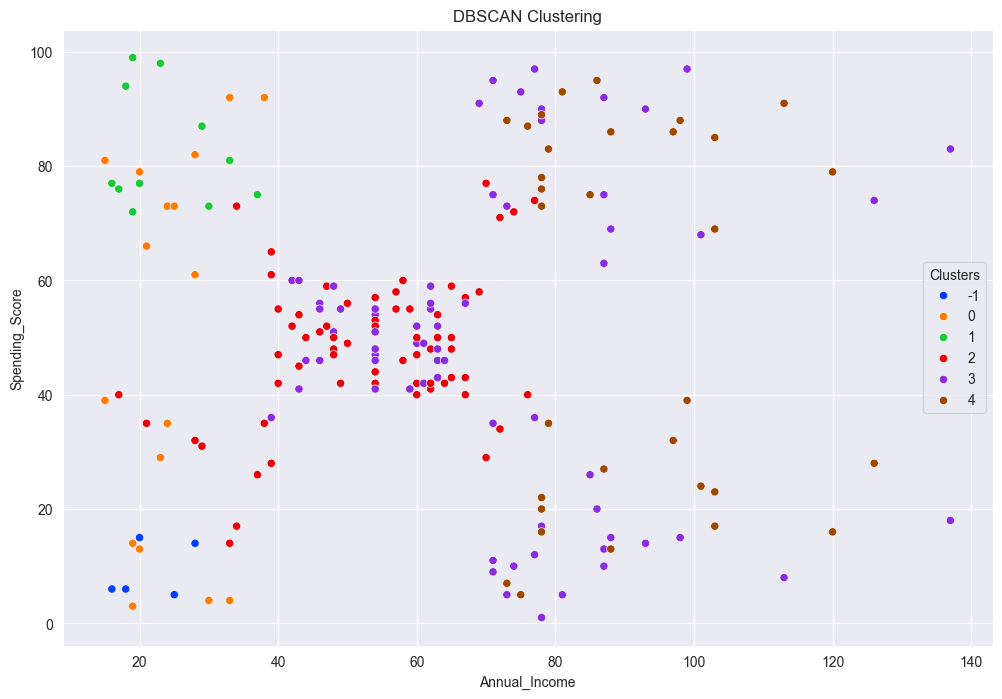

In [87]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = db_df['Annual_Income'], y = db_df['Spending_Score'], hue=db_df['Clusters'], 
                palette=sns.color_palette('bright', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN Clustering')
plt.show()